In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('claimants.csv')

In [4]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [6]:
df.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [9]:
df.shape

(1096, 7)

In [10]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1334,34104,1,1.0,1.0,0.0,16.0,0.060
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [11]:
df.drop('CASENUM',axis = 1,inplace=True)

In [12]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1334,1,1.0,1.0,0.0,16.0,0.060
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


# model building

In [13]:
X = df.drop('ATTORNEY',axis = 1)
y = df['ATTORNEY']

In [14]:
y.value_counts()

0    578
1    518
Name: ATTORNEY, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logi = LogisticRegression()

In [17]:
logi.fit(X,y)

LogisticRegression()

In [18]:
y_pred = logi.predict(X)

In [19]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [20]:
df['y_pred'] = y_pred

In [21]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred
0,0,0.0,1.0,0.0,50.0,34.940,0
1,1,1.0,0.0,0.0,18.0,0.891,1
2,1,0.0,1.0,0.0,5.0,0.330,1
3,0,0.0,1.0,1.0,31.0,0.037,0
4,1,0.0,1.0,0.0,30.0,0.038,1
...,...,...,...,...,...,...,...
1334,1,1.0,1.0,0.0,16.0,0.060,1
1336,0,1.0,1.0,0.0,46.0,3.705,0
1337,1,1.0,1.0,0.0,39.0,0.099,1
1338,0,1.0,0.0,0.0,8.0,3.177,0


In [22]:
logi.predict_proba(X)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [23]:
y_pred_df = pd.DataFrame({'actual': y,
                          # 'prob': classifier.predict_proba(X)[:,1],
                         'predicted': logi.predict(X),
                         'p_0': [x[0] for x in logi.predict_proba(X)],
                         'p_1': [x[1] for x in logi.predict_proba(X)]})

In [24]:
y_pred_df.head(40)

,actual,predicted,p_0,p_1
0,0,0,0.999997,0.000003
1,1,1,0.492851,0.507149
2,1,1,0.424833,0.575167
3,0,0,0.502210,0.497790
4,1,1,0.359246,0.640754
5,0,1,0.282098,0.717902
6,0,0,0.711678,0.288322
7,0,0,0.696195,0.303805
8,1,1,0.293084,0.706916
10,0,0,0.787949,0.212051


In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y,y_pred)

array([[381, 197],
       [123, 395]], dtype=int64)

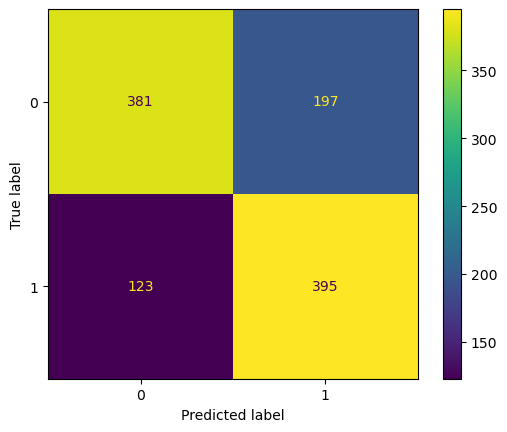

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y,y_pred)

In [28]:
(381+395)/1096

0.708029197080292

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y,y_pred)

0.708029197080292

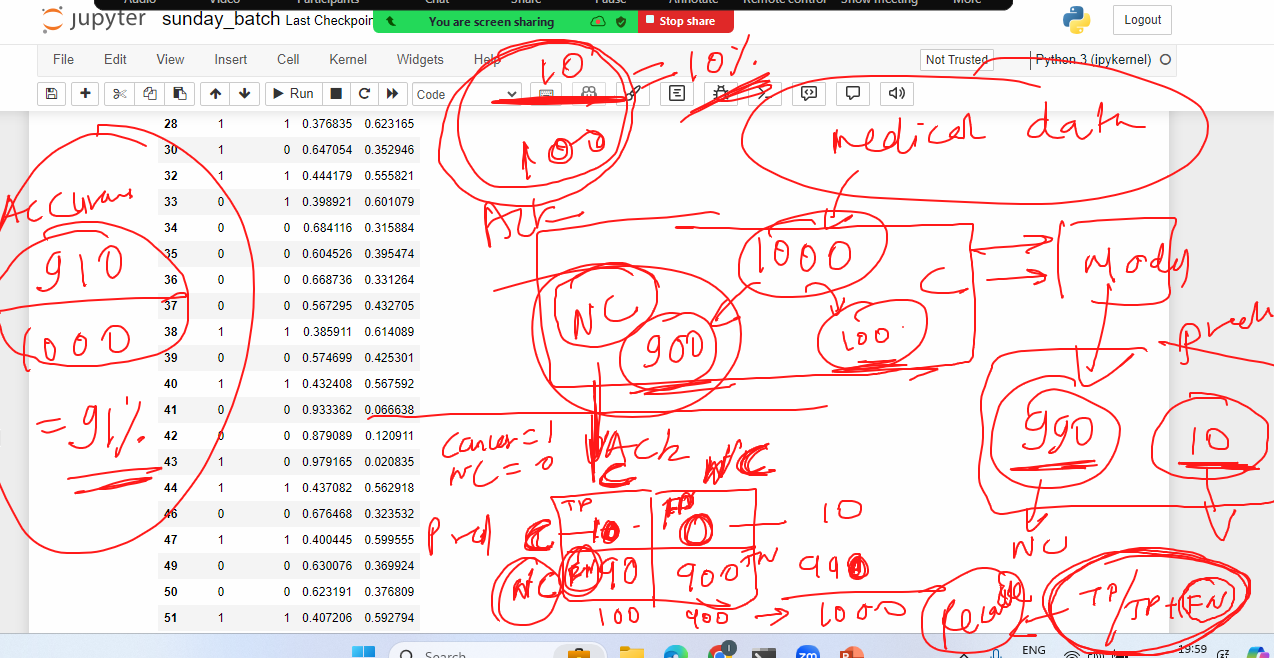

In [31]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [32]:
from sklearn.metrics import *

In [33]:
precision_score(y,y_pred)

0.6672297297297297

In [34]:
recall_score(y,y_pred)

0.7625482625482626

In [35]:
f1_score(y,y_pred)

0.7117117117117118

In [37]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096

